## Plot 3D time-series comparision between the predicted vs real pedestrian counts and delay


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
from math import sqrt
import numpy as np
import numpy as nps
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection
import os
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

from sys import path
path.append('..')

In [3]:
def draw_3d_2lines(data1, data2, ymin, ymax):
    '''Given data1 as a list of plots, each plot being a list
       of (x, y) vertices, generate a 3-d figure where each plot
       is shown as a translucent polygon.
       If line_at_zero, a line will be drawn through the zero point
       of each plot, otherwise the baseline will be at the bottom of
       the plot regardless of where the zero line is.
       Give also data2 for the second plot
    '''
    # add_collection3d() wants a collection of closed polygons;
    # each polygon needs a base and won't generate it automatically.
    # So for each subplot, add a base at ymin.

    for p in data1:
        p.insert(0, (p[0][0], 0))
        p.append((p[-1][0], 0))

    for p in data2:
        p.insert(0, (p[0][0], 0))
        p.append((p[-1][0], 0))

    facecolors = (1, 1, 1,0.5)
    edgecolors1 = (0, 0, 0, 1)
    edgecolors2 = (1, 0, 0, 1)

    poly1 = PolyCollection(data1,lw=1,linestyle = '-',
                          facecolors=facecolors, edgecolors=edgecolors1)

    poly2 = PolyCollection(data2,lw=1,linestyle = '-',
                          facecolors=facecolors, edgecolors=edgecolors2)

    zs = range(len(data1))
    plt.tight_layout(pad=2.0, w_pad=10.0, h_pad=3.0)

    ax.add_collection3d(poly1, zs=zs, zdir='y')
    ax.add_collection3d(poly2, zs=zs, zdir='y')

### Experiment 1: Known demand

##### Pedestrian counts: LSTM results with look_back = 5, step ahead = 5, 15 and population = 500

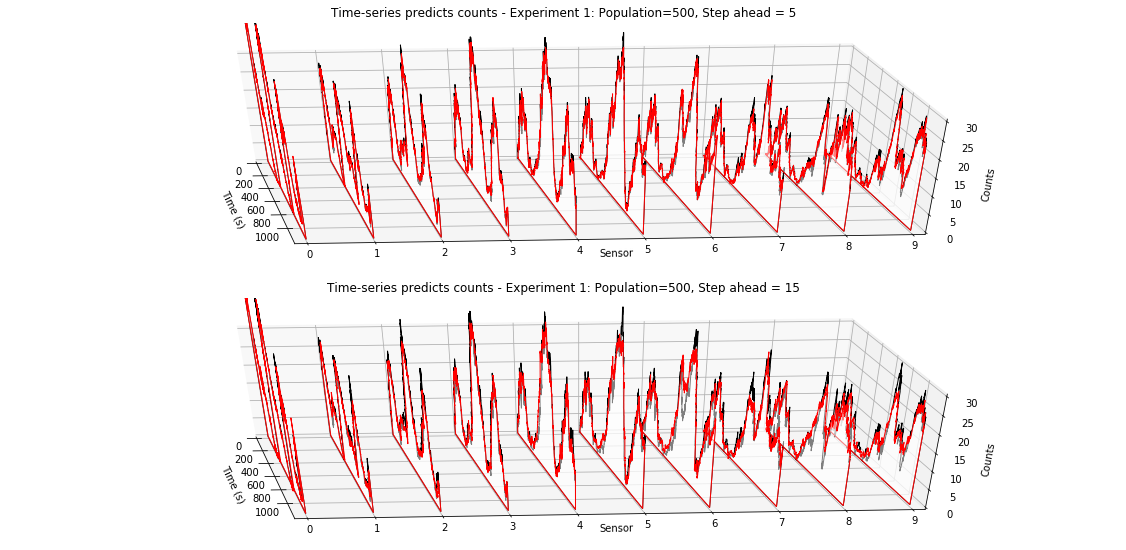

In [66]:
k=5
#m=1
look_back=5


fig = plt.figure(figsize=(16,8))
count0=1
for m in [5,15]:

    predicts = pd.read_csv("../outputs/LSTM/test/Testv5_32c"+str(k)+"predict"+str(m)+".csv")
    reals = pd.read_csv("../outputs/LSTM/test/Testv5_32c"+str(k)+"real"+str(m)+".csv")


    df_test = []
    df_pred = []
    for i in range(0,10):
        data_bin_test= []
        data_bin_pred= []
        #mean_y = np.mean(y_test[:,i])
        for j in range(0,1199-look_back*2-m):
            data_bin_test.append((j,reals.loc[j][i+2]))
            #print(reals.loc[j][i+2])
            data_bin_pred.append((j,predicts.loc[j][i+2]))
            #print(predicts.loc[j][i+2])
        df_pred.append(data_bin_pred)
        df_test.append(data_bin_test)

    ax = fig.add_subplot(2,1,count0, projection='3d')
    ax.view_init(35,-6)
    draw_3d_2lines(df_test,df_pred, 0, 1.5)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Sensor')
    ax.set_zlabel('Counts')

    ax.set_xlim3d(0, 1190)
    ax.set_ylim3d(0, 9)
    ax.set_zlim3d(0, 30)
    ax.set_title('Time-series predicts counts - Experiment 1: Population=' + str(k) + '00, Step ahead = ' +str(m))
    count0 =count0+1
plotname = '../figures/TS_LSTM_pop'+str(k)+'00.pdf'
plt.savefig(plotname)
plt.show()

##### Pedestrian counts: RF results with look_back = 1, step ahead = 5, 15 and population = 500

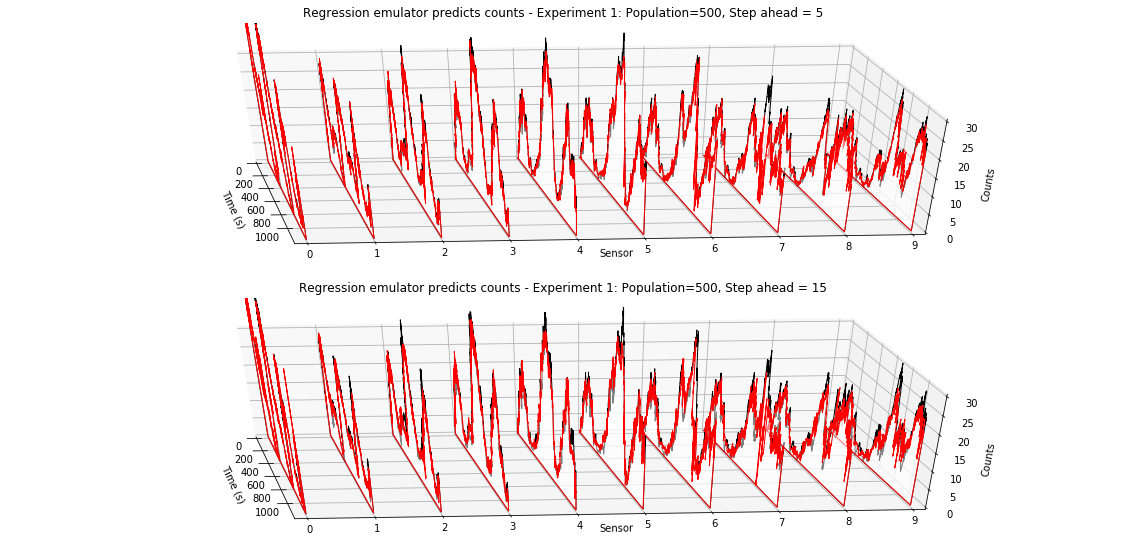

In [67]:
k=5
look_back=1
fig = plt.figure(figsize=(16,8))
count0=1
for m in [5,15]:

    predicts = pd.read_csv("../outputs/RF/Test_pop"+str(k)+"00_predict_SH"+str(m)+"_RF.csv")
    reals = pd.read_csv("../outputs/RF/Test_pop"+str(k)+"00_real_SH"+str(m)+"_RF.csv")


    df_test = []
    df_pred = []
    for i in range(0,10):
        data_bin_test= []
        data_bin_pred= []
        #mean_y = np.mean(y_test[:,i])
        for j in range(0,1199-look_back*2-m):
            data_bin_test.append((j,reals.loc[j][i+1]))
            #print(reals.loc[j][i+2])
            data_bin_pred.append((j,predicts.loc[j][i+1]))
            #print(predicts.loc[j][i+2])
        df_pred.append(data_bin_pred)
        df_test.append(data_bin_test)

    ax = fig.add_subplot(2,1,count0, projection='3d')
    ax.view_init(35,-6)
    draw_3d_2lines(df_test,df_pred, 0, 1.5)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Sensor')
    ax.set_zlabel('Counts')

    ax.set_xlim3d(0, 1190)
    ax.set_ylim3d(0, 9)
    ax.set_zlim3d(0, 30)
    ax.set_title('Regression emulator predicts counts - Experiment 1: Population=' + str(k) + '00, Step ahead = ' +str(m))
    count0 =count0+1
plotname = '../figures/TS_RF_pop'+str(k)+'00.pdf'
plt.savefig(plotname)
plt.show()

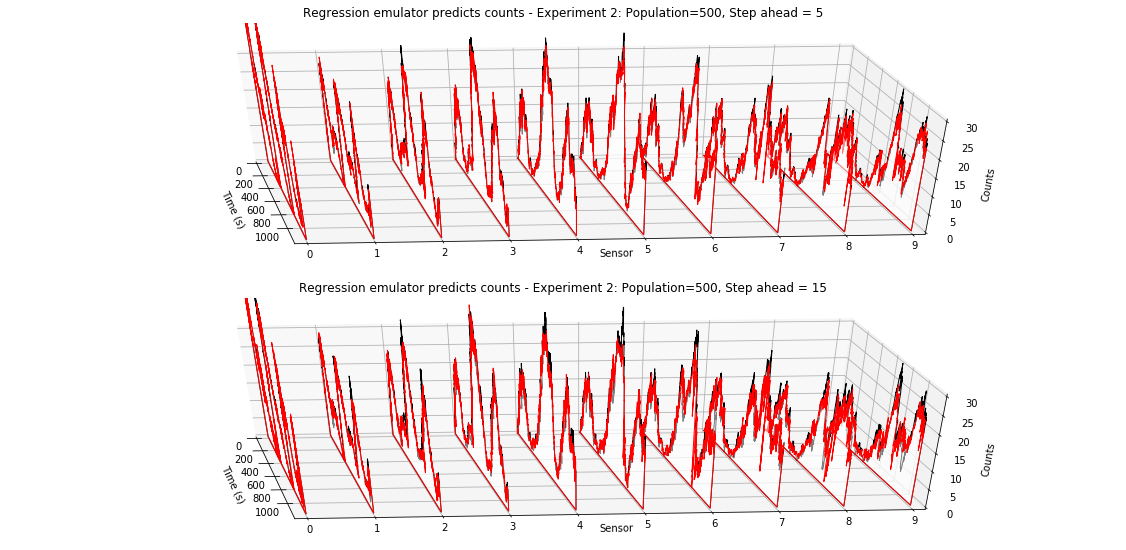

In [62]:
## Pedestrian counts prediciton: RF with unknown pedestrian counts

k=5
look_back=1
fig = plt.figure(figsize=(16,8))
count0=1
for m in [5,15]:

    predicts = pd.read_csv("../outputs/RF/All_pop"+str(k)+"00_predict_SH"+str(m)+"_RF.csv")
    reals = pd.read_csv("../outputs/RF/All_pop"+str(k)+"00_real_SH"+str(m)+"_RF.csv")


    df_test = []
    df_pred = []
    for i in range(0,10):
        data_bin_test= []
        data_bin_pred= []
        #mean_y = np.mean(y_test[:,i])
        for j in range(0,1199-look_back*2-m):
            data_bin_test.append((j,reals.loc[j][i+1]))
            #print(reals.loc[j][i+2])
            data_bin_pred.append((j,predicts.loc[j][i+1]))
            #print(predicts.loc[j][i+2])
        df_pred.append(data_bin_pred)
        df_test.append(data_bin_test)

    ax = fig.add_subplot(2,1,count0, projection='3d')
    ax.view_init(35,-6)
    draw_3d_2lines(df_test,df_pred, 0, 1.5)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Sensor')
    ax.set_zlabel('Counts')

    ax.set_xlim3d(0, 1190)
    ax.set_ylim3d(0, 9)
    ax.set_zlim3d(0, 30)
    ax.set_title('Regression emulator predicts counts - Experiment 2: Population=' + str(k) + '00, Step ahead = ' +str(m))
    count0 =count0+1
plotname = '../figures/TS_all_RF_pop'+str(k)+'00.pdf'
plt.savefig(plotname)
plt.show()

##### Delay: LSTM results with look_back = 5, step ahead = 5, 15 and population = 100 to 500

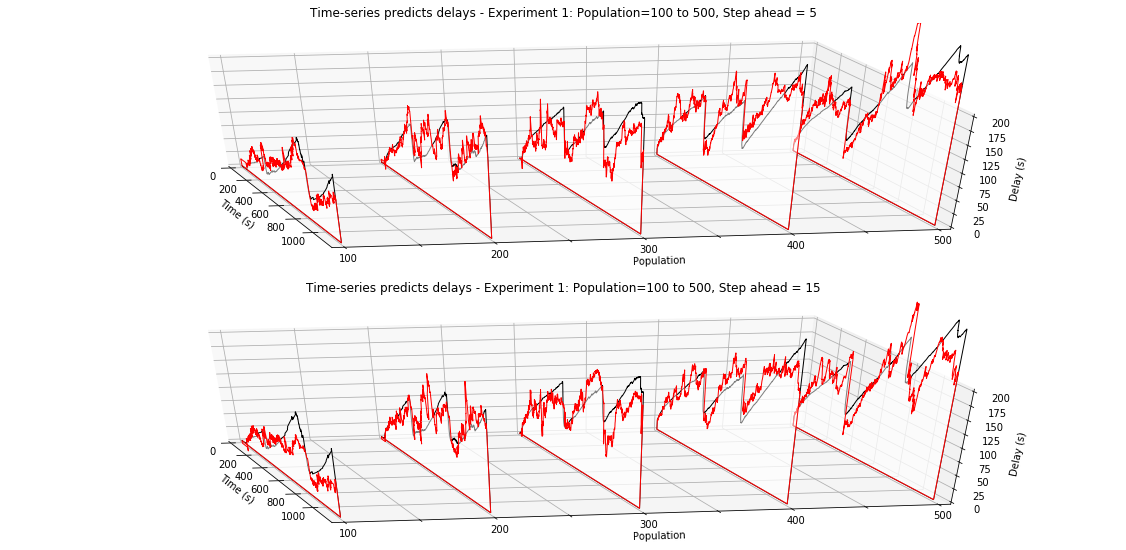

In [63]:
look_back=5
fig = plt.figure(figsize=(16,8))
count0=1
labels = ['100','', '200','', '300','', '400','', '500','']

for m in [5,15]:

    df_test = []
    df_pred = []
    for k in range(1,6):
        
        predicts = pd.read_csv("../outputs/LSTM/test/Testv5_32c"+str(k)+"predict"+str(m)+".csv")
        reals = pd.read_csv("../outputs/LSTM/test/Testv5_32c"+str(k)+"real"+str(m)+".csv")

        data_bin_test= []
        data_bin_pred= []
        #mean_y = np.mean(y_test[:,i])
        for j in range(0,1199-look_back*2-m):
            data_bin_test.append((j,reals.loc[j][1]))
            #print(reals.loc[j][i+2])
            data_bin_pred.append((j,predicts.loc[j][1]))
            #print(predicts.loc[j][i+2])
        df_pred.append(data_bin_pred)
        df_test.append(data_bin_test)

    ax = fig.add_subplot(2,1,count0, projection='3d')
    ax.view_init(35,-12)
    draw_3d_2lines(df_test,df_pred, 0, 1.5)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Population',labelpad=20)
    ax.set_zlabel('Delay (s)')
    ax.set_xlim3d(0, 1190)
    ax.set_ylim3d(0, 4)
    ax.set_zlim3d(0, 200)
    ax.set_title('Time-series predicts delays - Experiment 1: Population=100 to 500, Step ahead = ' +str(m))
    ax.set_yticklabels(labels)
    count0 =count0+1
plotname = '../figures/TS_LSTM_pop'+str(k)+'00_delay.pdf'
plt.savefig(plotname)
plt.show()

##### Delay: RF results with look_back = 5, step ahead = 5, 15 and population = 100 to 500

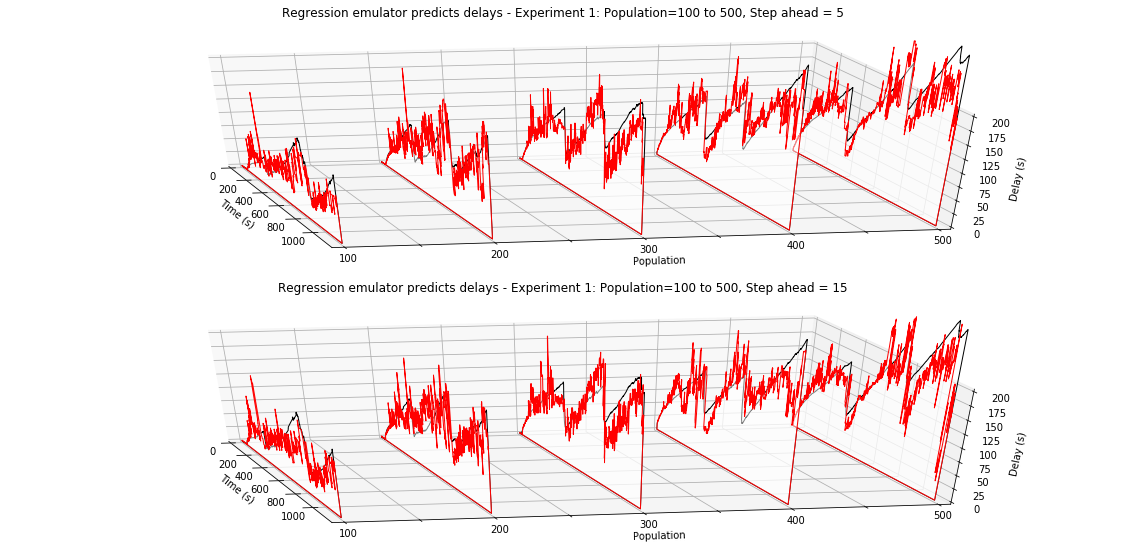

In [64]:
look_back=1
fig = plt.figure(figsize=(16,8))
count0=1
labels = ['100','', '200','', '300','', '400','', '500','']

for m in [5,15]:

    df_test = []
    df_pred = []
    for k in range(1,6):
        
        predicts = pd.read_csv("../outputs/RF/Test_pop"+str(k)+"00_predict_SH"+str(m)+"_RF.csv")
        reals = pd.read_csv("../outputs/RF/Test_pop"+str(k)+"00_real_SH"+str(m)+"_RF.csv")

        data_bin_test= []
        data_bin_pred= []
        #mean_y = np.mean(y_test[:,i])
        for j in range(0,1199-look_back*2-m):
            data_bin_test.append((j,reals.loc[j][11]))
            #print(reals.loc[j][i+2])
            data_bin_pred.append((j,predicts.loc[j][11]))
            #print(predicts.loc[j][i+2])
        df_pred.append(data_bin_pred)
        df_test.append(data_bin_test)

    ax = fig.add_subplot(2,1,count0, projection='3d')
    ax.view_init(35,-12)
    draw_3d_2lines(df_test,df_pred, 0, 1.5)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Population',labelpad=20)
    ax.set_zlabel('Delay (s)')
    ax.set_xlim3d(0, 1190)
    ax.set_ylim3d(0, 4)
    ax.set_zlim3d(0, 200)
    ax.set_title('Regression emulator predicts delays - Experiment 1: Population=100 to 500, Step ahead = ' +str(m))
    ax.set_yticklabels(labels)
    count0 =count0+1
plotname = '../figures/TS_RF_pop'+str(k)+'00_delay.pdf'
plt.savefig(plotname)
plt.show()

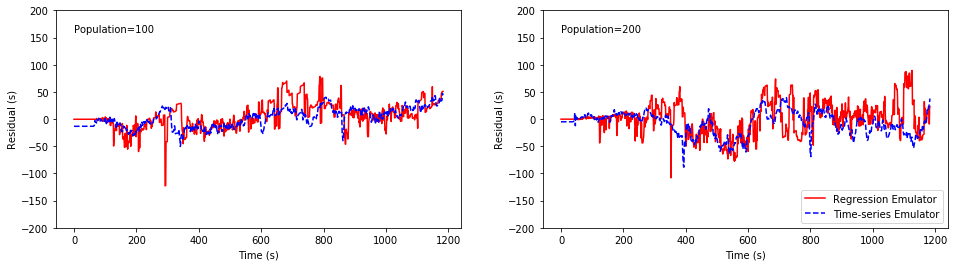

In [187]:
### Plot the absolute error at each time step, for each population, and compare RF to LSTM
look_back = 5

fig = plt.figure(figsize=(16,4))
count0=1
labels = ['100','', '200','', '300','', '400','', '500','']

for m in [5]:
    
    data_error_RF=[]
    data_error_LSTM=[]
    for k in range(1,3):
        
        predicts_RF = pd.read_csv("../outputs/RF/Test_pop"+str(k)+"00_predict_SH"+str(m)+"_RF.csv")
        reals_RF = pd.read_csv("../outputs/RF/Test_pop"+str(k)+"00_real_SH"+str(m)+"_RF.csv")

        predicts_LSTM = pd.read_csv("../outputs/LSTM/test/Testv5_32c"+str(k)+"predict"+str(m)+".csv")
        reals_LSTM = pd.read_csv("../outputs/LSTM/test/Testv5_32c"+str(k)+"real"+str(m)+".csv")
        
        
        error_RF= []
        error_LSTM= []
        #mean_y = np.mean(y_test[:,i])
        for j in range(0,1199-look_back*2-m):
            error_RF.append((j,reals_RF.loc[j][11]-predicts_RF.loc[j][11]))
            error_LSTM.append((j,reals_LSTM.loc[j][1]-predicts_LSTM.loc[j][1]))
        
        
        error_RF=np.array(error_RF)
        error_LSTM = np.array(error_LSTM)
        ax = fig.add_subplot(1,2,count0)
        plt.plot(error_RF[:,0],error_RF[:,1],linestyle='-',color='red',label='Regression Emulator')
        plt.plot(error_LSTM[:,0], error_LSTM[:,1],linestyle='--',color='blue',label='Time-series Emulator')
        
        text0 = 'Population=' +str(k) + '00'
        plt.text(0,160,text0)
        ax.set_ylim([-200,200])
        ax.set_ylabel('Residual (s)')
        ax.set_xlabel('Time (s)',labelpad=5)
        if (count0 == 4) or (count0==5):
            ax.set_xlabel('Time (s)',labelpad=5)
        
        if count0==2:
            ax.legend(loc='lower right')
        count0 =count0+1
        
#ax.set_xlabel('Time (s)',labelpad=5)

plotname = '../figures/TS_compare_delay.pdf'
plt.savefig(plotname)
plt.show()


### Experiment 2: Unknown demand

#### RF on unknown demand -- delay

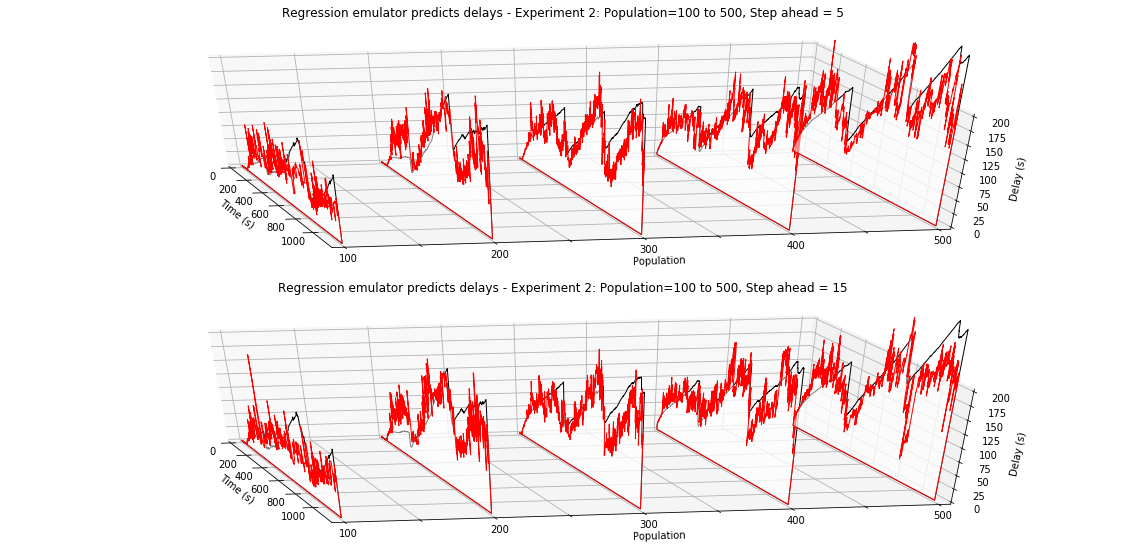

In [6]:
### experiment 2: Unknown population RF

look_back=1
fig = plt.figure(figsize=(16,8))
count0=1
labels = ['100','', '200','', '300','', '400','', '500','']

for m in [5,15]:

    df_test = []
    df_pred = []
    for k in range(1,6):
        
        predicts = pd.read_csv("../outputs/RF/All_pop"+str(k)+"00_predict_SH"+str(m)+"_RF.csv")
        reals = pd.read_csv("../outputs/RF/All_pop"+str(k)+"00_real_SH"+str(m)+"_RF.csv")

        data_bin_test= []
        data_bin_pred= []
        #mean_y = np.mean(y_test[:,i])
        for j in range(0,1199-look_back*2-m):
            data_bin_test.append((j,reals.loc[j][11]))
            #print(reals.loc[j][i+2])
            data_bin_pred.append((j,predicts.loc[j][11]))
            #print(predicts.loc[j][i+2])
        df_pred.append(data_bin_pred)
        df_test.append(data_bin_test)

    ax = fig.add_subplot(2,1,count0, projection='3d')
    ax.view_init(35,-12)
    draw_3d_2lines(df_test,df_pred, 0, 1.5)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Population',labelpad=20)
    ax.set_zlabel('Delay (s)')
    ax.set_xlim3d(0, 1190)
    ax.set_ylim3d(0, 4)
    ax.set_zlim3d(0, 200)
    ax.set_title('Regression emulator predicts delays - Experiment 2: Population=100 to 500, Step ahead = ' +str(m))
    ax.set_yticklabels(labels)
    count0 =count0+1
plotname = '../figures/TS_all_RF_pop'+str(k)+'00_delay.pdf'
plt.savefig(plotname)
plt.show()

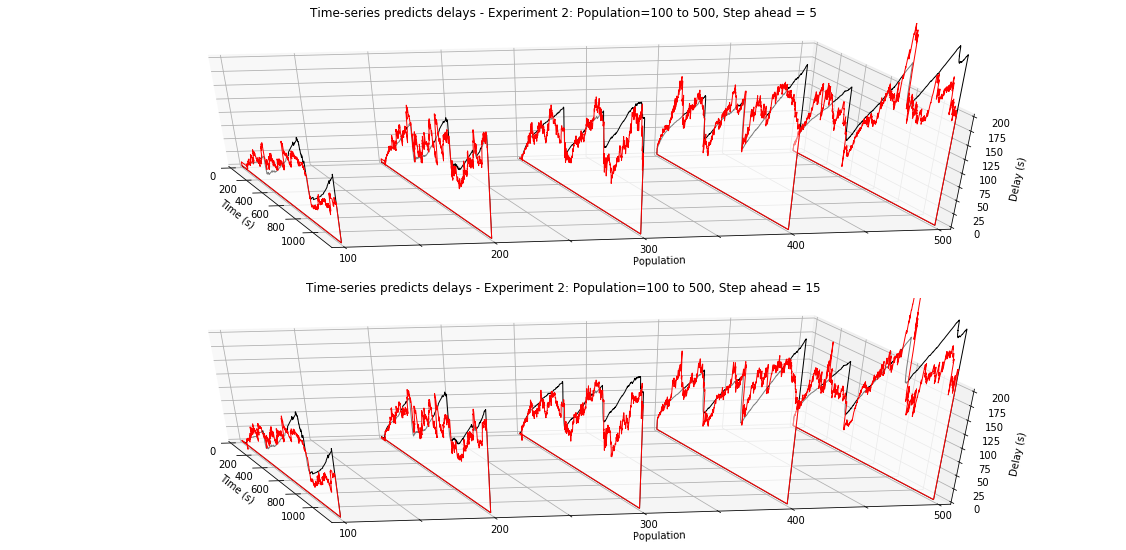

In [7]:
look_back=5
fig = plt.figure(figsize=(16,8))
count0=1
labels = ['100','', '200','', '300','', '400','', '500','']

for m in [5,15]:

    df_test = []
    df_pred = []
    for k in range(1,6):
        
        predicts = pd.read_csv("../outputs/LSTM/all/Testv5ball"+str(k)+"predict"+str(m)+".csv")
        reals = pd.read_csv("../outputs/LSTM/all/Testv5ball"+str(k)+"real"+str(m)+".csv")

        data_bin_test= []
        data_bin_pred= []
        #mean_y = np.mean(y_test[:,i])
        for j in range(0,1199-look_back*2-m):
            data_bin_test.append((j,reals.loc[j][1]))
            #print(reals.loc[j][i+2])
            data_bin_pred.append((j,predicts.loc[j][1]))
            #print(predicts.loc[j][i+2])
        df_pred.append(data_bin_pred)
        df_test.append(data_bin_test)

    ax = fig.add_subplot(2,1,count0, projection='3d')
    ax.view_init(35,-12)
    draw_3d_2lines(df_test,df_pred, 0, 1.5)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Population',labelpad=20)
    ax.set_zlabel('Delay (s)')
    ax.set_xlim3d(0, 1190)
    ax.set_ylim3d(0, 4)
    ax.set_zlim3d(0, 200)
    ax.set_title('Time-series predicts delays - Experiment 2: Population=100 to 500, Step ahead = ' +str(m))
    ax.set_yticklabels(labels)
    count0 =count0+1
plotname = '../figures/TS_all_LSTM_pop'+str(k)+'00_delay.pdf'
plt.savefig(plotname)
plt.show()

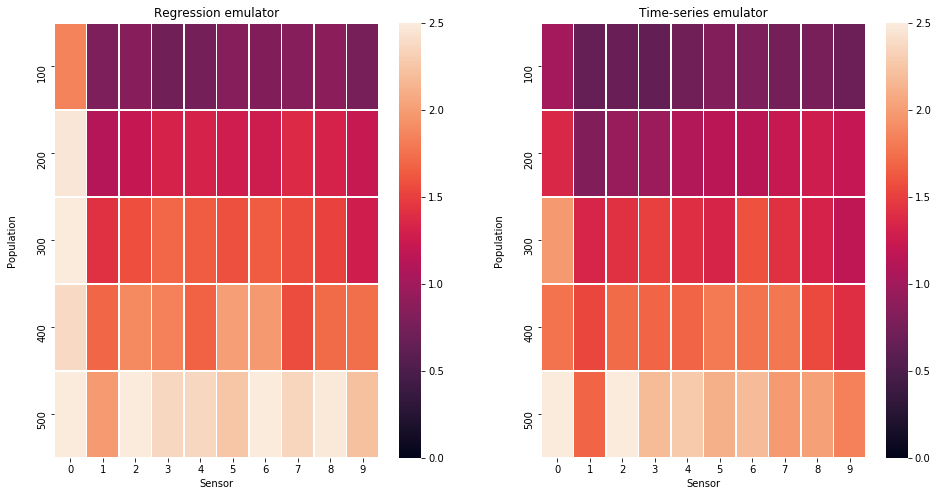

In [21]:
#calculate MAE, RMSE for sensors for 15-step
import seaborn as sns

fig = plt.figure(figsize=(16,8))

columns = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
labels = ['100', '200', '300', '400', '500']

maes = pd.DataFrame(columns=columns)
for k in range(1,6):
    #print("Evalue data: ", k)
    mae = []
    rmse = []
    #for m in range(3,4):
    #    #print("Step ahead: ", m)
    predicts = pd.read_csv("../outputs/RF/All_pop"+str(k)+"00_predict_SH15_RF.csv")
    reals = pd.read_csv("../outputs/RF/All_pop"+str(k)+"00_real_SH15_RF.csv")

    
    #print(mean_absolute_error(predicts[0].values, reals[0].values))
    for m in range(0,10):
        mae.append(mean_absolute_error(predicts[str(m)].values, reals[str(m)].values))
    mae = pd.Series(mae)
    mae = pd.DataFrame([mae])
    maes = pd.concat([maes, mae], ignore_index=True)

ax = fig.add_subplot(1,2,1)
sns.heatmap(maes, linewidth=0.5,vmin=0, vmax=2.5)
ax.set_xlabel('Sensor')
ax.set_ylabel('Population',labelpad=20)
ax.set_title('Regression emulator')
ax.set_yticklabels(labels)
maes = pd.DataFrame(columns=columns)
for k in range(1,6):
    #print("Evalue data: ", k)
    mae = []
    rmse = []
    #for m in range(3,4):
    #    #print("Step ahead: ", m)
    predicts = pd.read_csv("../outputs/LSTM/all/Testv5ball"+str(k)+"predict"+str(15)+".csv")
    reals = pd.read_csv("../outputs/LSTM/all/Testv5ball"+str(k)+"real"+str(15)+".csv")
    
    
    #print(mean_absolute_error(predicts[0].values, reals[0].values))
    for m in range(1,11):
        mae.append(mean_absolute_error(predicts[str(m)].values, reals[str(m)].values))
    mae = pd.Series(mae)
    mae = pd.DataFrame([mae])
    maes = pd.concat([maes, mae], ignore_index=True)

ax = fig.add_subplot(1,2,2)
sns.heatmap(maes, linewidth=0.5,vmin=0, vmax=2.5)
ax.set_xlabel('Sensor')
ax.set_ylabel('Population',labelpad=20)
ax.set_title('Time-series emulator')
ax.set_yticklabels(labels)

plotname = '../figures/PedCounts.pdf'
plt.savefig(plotname)
plt.show()
